# Mental Health in Tech Industry

## Connection Code

In [3]:
import numpy as np
import pandas as pd
from google.cloud import bigquery
from google.oauth2 import service_account
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

credentials = service_account.Credentials.from_service_account_file(
    'H:/Workspace_py/Project/input/mental-health-data-910dace24efa.json')
project_id = 'mentalhealth9911'
client = bigquery.Client(credentials= credentials,project=project_id)
query_job = client.query("""
  SELECT * FROM `mentalhealth9911.healthsurvey.healthsurvey` """)
results = query_job.result()

df = results.to_dataframe()
df.head()

print(df.info())

df['Age'] = pd.to_numeric(df['Age'],errors='coerce')

def age_process(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan

df['Age']=df['Age'].apply(age_process)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null datetime64[ns, UTC]
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        1259 non-null object
self_employed                1259 non-null object
family_history               1259 non-null bool
treatment                    1259 non-null bool
work_interfere               1259 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null bool
tech_company                 1259 non-null bool
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-n

## 1)  Effect on mental health of person based on his age ?

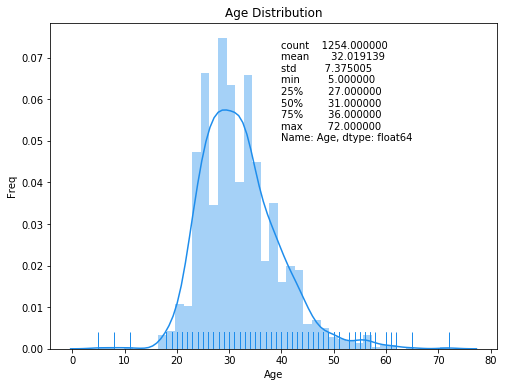

In [6]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(df['Age'].dropna(),ax=ax,kde=True,rug=True,color='#1e8dec')
s="" +str(df['Age'].describe())
plt.text(40,0.05,s);
plt.title('Age Distribution')
plt.ylabel('Freq')
#plt.grid()
plt.show()


## 2) CountryWise Mental health reports based on survey

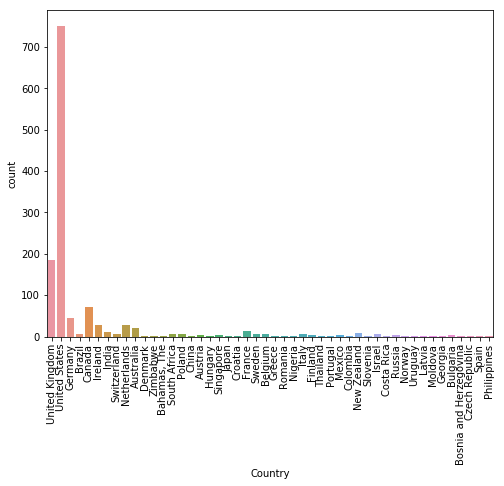

In [5]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Country']);
plt.xticks(rotation='vertical');
plt.show()

## 3) What are top ten country in world having highest mental health issue in IT ?

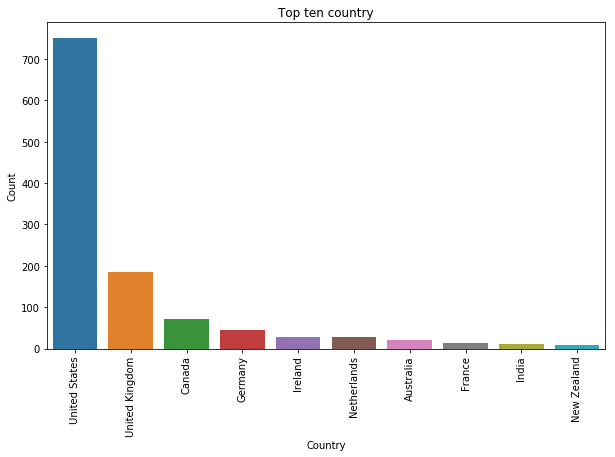

In [6]:
from collections import Counter
country_count=Counter(df['Country'].dropna().tolist()).most_common(10)
country_index=[country[0] for country in country_count]
conuntry_val=[country[1] for country in country_count]
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x=country_index,y=conuntry_val,ax=ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

## 4) What is gender ratio in this survey?

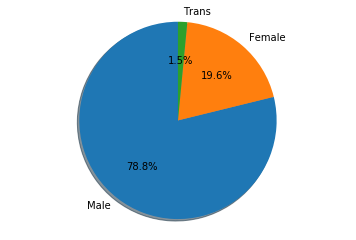

In [21]:

import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
from plotly.offline import init_notebook_mode
from collections import Counter
from subprocess import check_output
survey=df
survey['Gender'] = survey['Gender'].str.lower()
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
survey['Gender'] = survey['Gender'].apply(lambda x:"Male" if x in male else x)
survey['Gender'] = survey['Gender'].apply(lambda x:"Female" if x in female else x)
survey['Gender'] = survey['Gender'].apply(lambda x:"Trans" if x in trans else x)
survey.drop(survey[survey.Gender == 'p'].index, inplace=True)
survey.drop(survey[survey.Gender == 'a little about you'].index, inplace=True)


labels = survey['Gender'].value_counts().index
values = survey['Gender'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## 5) Do people receive treatment in their firm related to mental health?

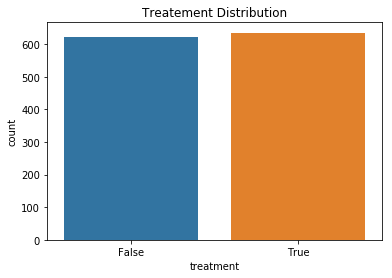

In [22]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='%Y-%m-%d')
df['Year'] = df['Timestamp'].apply(lambda x:x.year)
sns.countplot(df['treatment'])
plt.title('Treatement Distribution')
plt.show()

## 6) Mental issues in family history of employee with respect to age

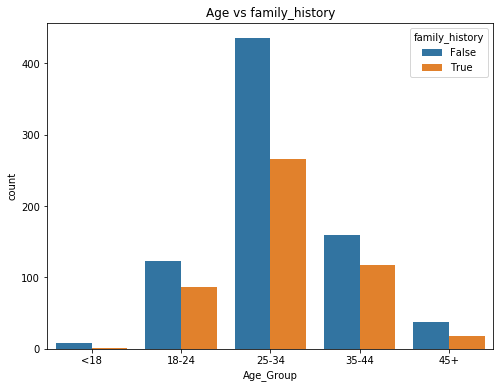

In [23]:

df['Age_Group'] = pd.cut(df['Age'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'])

fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df,x = 'Age_Group',hue= 'family_history',ax=ax)
plt.title('Age vs family_history')
plt.show()

## 7) Mental health with respect to gender in IT Industry 

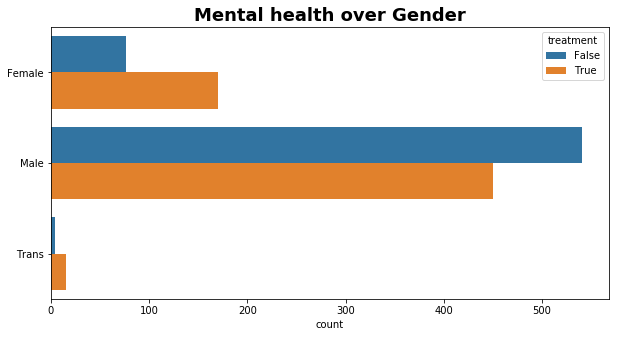

In [7]:
survey=df
survey['Gender'] = survey['Gender'].str.lower()
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
survey['Gender'] = survey['Gender'].apply(lambda x:"Male" if x in male else x)
survey['Gender'] = survey['Gender'].apply(lambda x:"Female" if x in female else x)
survey['Gender'] = survey['Gender'].apply(lambda x:"Trans" if x in trans else x)
survey.drop(survey[survey.Gender == 'p'].index, inplace=True)
survey.drop(survey[survey.Gender == 'a little about you'].index, inplace=True)



plt.figure(figsize=(10,5))
sns.countplot(y="Gender", hue="treatment", data=survey)
plt.title("Mental health over Gender",fontsize=18,fontweight="bold")
plt.ylabel("")
plt.show()